Exercise 1: Suppose you administer a questionnaire that involves the following question:

- "Do you think things are heading in the right direction or do you believe things have pretty seriously gotten off on the wrong track?"

You want to take these 1,000 survey responses as your $Y$ and build a model using geographic and demographic data to predict answers for the rest of your voting population. What generalized linear model is most appropriate here? Why?

In [ ]:
#This is going to be a binary response variable i.e. yes/no. You are therefore going to want to use a logistical
#regression model to look at the probability of a 'yes' reponse limited to between 0 and 1. 

Exercise 2: Suppose you administer a questionnaire that involves the following question:

- "Do you strongly approve, somewhat approve, feel neutral about, somewhat disapprove, or strongly disapprove of the President's performance so far?"

You want to take these 1,000 survey responses as your $Y$ and build a model using geographic and demographic data to predict answers for the rest of your voting population. What generalized linear model is most appropriate here? Why?

In [ ]:
#Ordinal logistic regression. Because there are more than two discrete categories, but they are ordered in intensity. 

Exercise 3: Suppose you administer a questionnaire that involves the following question:

- "When deciding who to vote for in the upcoming election, which of the following is most important? National security, jobs/economy, or social issues?"

You want to take these 1,000 survey responses as your $Y$ and build a model using geographic and demographic data to predict answers for the rest of your voting population. What generalized linear model is most appropriate here? Why?

In [ ]:
#Multinomial logistic regression. Because there are  3 discrete, unordered categorical response values. 

Exercise 4: Suppose you administer a questionnaire that involves the following question:

- "In the past week, how many times have you seen a commercial or advertisement involving this candidate?"

You want to take these 1,000 survey responses as your $Y$ and build a model using geographic and demographic data to predict answers for the rest of your voting population. What generalized linear model is most appropriate here? Why?

In [ ]:
#Poisson regression. There are an inifnite number of discrete 'categories' and there is no reason to suspect
#that variance is greater than the e(x). 

Exercise 5: In this problem, we'll guide you through (partially) using a new type of GLM. However, as you do this problem, think about this in the broader context of data science. In particular:
- If you observe something weird in the data, can you explain why it's happening? Don't just think about data munging errors you might have made - also think about causes beyond your control, like data collection or measurement.
- If you know your data are telling you something, can you model it?

Suppose I have access to voting history and demographic information for all people in the state of Virginia. There's a column for whether or not people voted in the 2016 election.
- Consider a 35 year old woman who did not vote in the 2016 election. She has a `0` in the `2016_voted` column.
- Consider a 14 year old man who did not vote in the 2016 election. He has a `0` in the `2016_voted` column.

In a Pandas DataFrame, the zeros look exactly the same. There's no difference in our DataFrame between a `0` because someone chose to not vote and a `0` because someone wasn't legally allowed to vote. Python won't know the difference, but you and I will! Because of this, we probably don't want to just pass these `0`s into `statsmodels` like they're all the same... instead, we might want to find a modeling technique that can account for this! *(If this doesn't make sense, chat with a classmate or your local instructor before moving on.)*

There are special types of models called "zero-inflated" models that can handle exactly this situation - where there are more zeros than we'd expect, but some of the zeros are "structural," or caused by some other process. (In this specific instance, we observe more zeros because of the age restriction on voting.) In cases where there are a lot of zeros, we might want to explore the data and the problem we're trying to solve to understand why there are so many zeros.
- Our first question is: Are there more zeros than we'd expect?
    - If yes, move to the second question.
    - If no, we probably don't need to consider a zero-inflated model.
- Our second question is: Is there some explanation for why we observe so many zeros? (i.e. data collection, data transcription error, measurement error...)
    - If yes, then let's try to model that.
    - If no, then proceed with caution.

**Data Summary**: The state wildlife biologists want to model how many fish are being caught by fishermen at a state park. Visitors are asked how long they stayed, how many people were in the group, were there children in the group and how many fish were caught. Some visitors do not fish, but there is no data on whether a person fished or not.

We'll be using the fish data below. Your $Y$ variable is `count`.

In [68]:
import pandas as pd
fish = pd.read_csv("https://stats.idre.ucla.edu/stat/data/fish.csv")

Exercise 5.1: Given the scenario above, how might this data be susceptible to having an inflated number of zeros?

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
#People who caught 0 fish (but fished) will look just like people who caught 0 fish and did NOT fish.

Exercise 5.2: Do some EDA to explore whether or not there are an inflated number of zeros in `count`. Try a few things, including:
- Histogram of `count`.
- Finding the mean of `count`, then overlaying a Poisson distribution with that mean on the histogram of `count`. Does it visually look like a good fit?

In [69]:
fish.head()
len(fish)

250

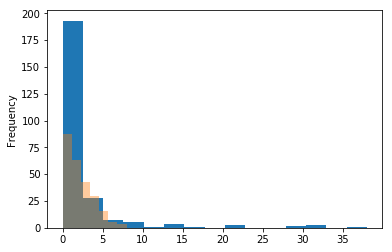

In [62]:
fig = plt.figure()
ax = fig.gca()
fish['count'].loc[fish['count'] < 60].plot.hist(bins=15)
plt.hist(np.random.poisson(2.46, 248), bins=7, alpha=0.4)
plt.show()

In [70]:
fish = fish.loc[fish['count'] < 40]
len(fish)

248

Exercise 5.3: If we have a Poisson distribution with a fixed mean $\lambda$, we can find the exact percentage of zeros we would expect to see. Using the Poisson pdf, calculate $P(count=k) = \frac{\lambda^ke^{-\lambda}}{k!}$ for $k = 0$. This should tell you the exact percentage of zeros we expect to see, assuming that the data truly follow a $Poisson(\lambda)$ distribution.

In [82]:
from scipy.stats import poisson
dist = poisson(2.46)
dist.pmf(0)

0.085434950967321233

Exercise 5.4: It was annoying to have to use the actual Poisson pdf, right? Let's get the computer to do the work for us. Instead of getting the exact percentage of zeros we would expect to see, you can use Monte Carlo simulations to answer this. Randomly simulate 1,000 observations from a $Poisson(\lambda)$ distribution and see what percentage are equal to 0.

In [87]:
x = []
for p in range(1000):
    dist = list(np.random.poisson(2.46, 248))
    x.append(dist.count(0)/248)

In [88]:
np.mean(x)

0.084846774193548385

Exercise 5.5: Based on your answers in 5.2-5.4, is there enough evidence that `count` has too many zeros to be modeled with a non-zero-inflated Poisson distribution?

In [89]:
len(fish.loc[fish['count'] == 0])/248

0.5725806451612904

In [ ]:
#There are WAY too man zeros. We need to use zero inflated (57% in data vs. ~8% in poisson dist). 

Exercise 5.6: **Regardless of your answer to 5.5**, build two Poisson regression models (without zero-inflation) predicting `count`. You should:
- Do some additional EDA on your independent variables.
- Build the two models.
- Interpret at least two coefficients.
- Compare the two models using deviance. 
    - **NOTE: You can only compare the two models if they are nested!**

In [92]:
import statsmodels.api as sm

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [109]:
y_poi = fish[['count']]
x_poi = fish[['livebait', 'camper', 'persons', 'child']]
x_poi = sm.add_constant(x_poi)
glm_poi = sm.GLM(y_poi,
                 x_poi,
                 family = sm.families.Poisson()).fit()
glm_poi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                  248
Model:                            GLM   Df Residuals:                      243
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -611.18
Date:                Tue, 06 Feb 2018   Deviance:                       898.15
Time:                        14:20:22   Pearson chi2:                 1.77e+03
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6937      0.264    -10.188      0.000      -3.212      -2.175
livebait       1.5109      0.234      6.452      0.000       1.052       1.970
camper         0.5415      0.093      5.806      0.000       0.359       0.724
persons        0.8828      0.041     21.578      0.000       0.803       0.963
child         -1.4564      0.082    -17.711      0.000      -1.618      -1.295
==============================================================================
"""

In [102]:
import math
variables = ['livebait', 'camper', 'persons', 'child']
for y, x in enumerate(list(glm_poi.params)[1:]):
    coef = math.exp(x)
    print(variables[y], ': ', coef)

livebait :  4.5308122135181375
camper :  1.718640833439073
persons :  2.4176653282087495
child :  0.23308517241128512


In [104]:
#Using livebait was associated on average with 4.53 additional fish caught, holding other variables constant. 
#An additional 1 person in the group is associated on average with 2.4 additional fish caught, holding other variables constant. 

In [106]:
#dropping persons
y_poi = fish[['count']]
x_poi = fish[['livebait', 'camper', 'child']]
x_poi = sm.add_constant(x_poi)
glm_poi2 = sm.GLM(y_poi,
                 x_poi,
                 family = sm.families.Poisson()).fit()
glm_poi2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                  248
Model:                            GLM   Df Residuals:                      244
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -880.08
Date:                Tue, 06 Feb 2018   Deviance:                       1435.9
Time:                        14:17:49   Pearson chi2:                 2.68e+03
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5165      0.237     -2.179      0.029      -0.981      -0.052
livebait       1.5300      0.233      6.555      0.000       1.073       1.988
camper         0.6227      0.093      6.714      0.000       0.441       0.804
child         -0.9877      0.081    -12.253      0.000      -1.146      -0.830
==============================================================================
"""

In [110]:
from scipy.stats import chi2
D_poi =  glm_poi2.deviance - glm_poi.deviance 
print('Difference in Deviance: ', D_poi)
pval_poi = 1 - chi2.cdf(D_poi, 1)
print('p-value of test of difference: ', pval_poi)

Difference in Deviance:  537.800554561
p-value of test of difference:  0.0


In [ ]:
#reduced model is NOT better. We can reject that the reduced model is better at the 1% level.

**BONUS:** **Regardless of your answer to 5.5**, build a **zero-inflated** Poisson regression model without zero-inflation predicting `count`. Interpret your findings.